# Домашнее задание к лекции 2.6 «Инструменты для визуализации и изучения данных»

Решение выполнения задач необходимо предоставить в виде ссылки на файл формата Jupyter (ipynb) в GitHub.

В файле должны быть сохранены результаты запуска на тестовых данных.

Дано: данные о популярности имен для новорожденных, скачиваются по [ссылке](https://www.ssa.gov/oact/babynames/names.zip). Добавлять исходные данные в репозиторий с выполненным заданием необязательно, но в блокноте необходимо выделить путь к файлам в отдельную переменную, которую легко поменять.

1. Построить график изменения количества имен Ruth и Robert с 1900 по 2000.
2. Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).
3. Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.
4. Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

---
Домашнее задание сдается ссылкой на репозиторий [BitBucket](https://bitbucket.org/) или [GitHub](https://github.com/)

Не сможем проверить или помочь, если вы пришлете:
* архивы;
* скриншоты кода;
* теоретический рассказ о возникших проблемах.    

In [12]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,9

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Функция для подхватывания файлов из папки

def csv_to_df(year: str):
    file_path='names/'
    full_path = f'{file_path}yob{year}.txt'
#     print(full_path)
    df = pd.read_csv(full_path, names = ['Names', 'Gender', 'Count'])
    return df

In [4]:
# Подготовка данных

names_by_year = {}
for year in range(1900, 2001):
    names_by_year[year] = csv_to_df(year)

names_xx_cent = pd.concat(names_by_year).reset_index(level=0, drop=False)
names_xx_cent

,level_0,Names,Gender,Count
0,1900,Mary,F,16706
1,1900,Helen,F,6343
2,1900,Anna,F,6114
3,1900,Margaret,F,5304
4,1900,Ruth,F,4765
...,...,...,...,...
29767,2000,Zeph,M,5
29768,2000,Zeven,M,5
29769,2000,Ziggy,M,5
29770,2000,Zo,M,5


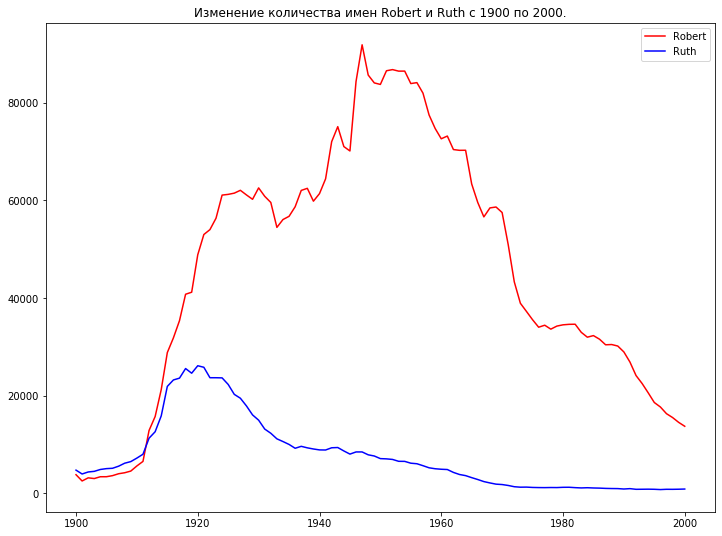

In [13]:
# Решение задачи 1

robert_dynamics = names_xx_cent[names_xx_cent['Names']=='Robert'].groupby(['level_0']).sum()
ruth_dynamics = names_xx_cent[names_xx_cent['Names']=='Ruth'].groupby(['level_0']).sum()

plt.plot(robert_dynamics, label = 'Robert', color = 'r')
plt.plot(ruth_dynamics, label = 'Ruth', color = 'b')
plt.title('Изменение количества имен Robert и Ruth с 1900 по 2000.')
plt.legend()

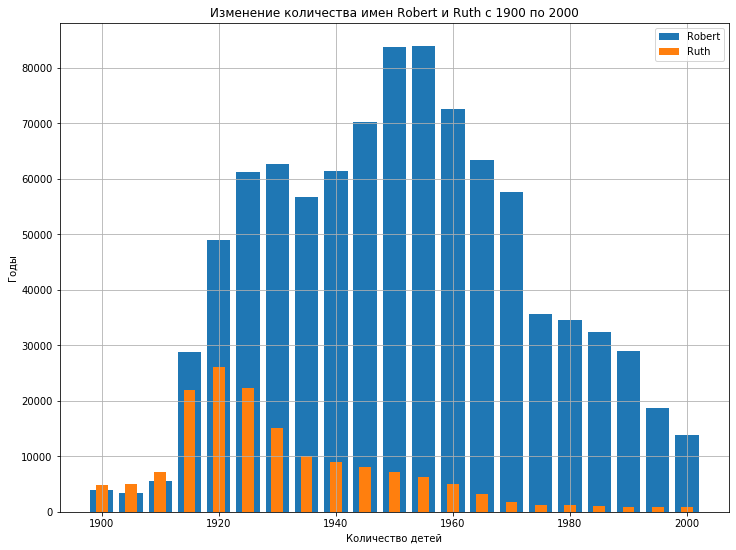

In [14]:
# Решение задачи 2

plt.bar(robert_dynamics[::5].index, robert_dynamics[::5]['Count'], label = 'Robert', width = 4)
plt.bar(ruth_dynamics[::5].index, ruth_dynamics[::5]['Count'], label = 'Ruth', width = 2)
plt.xlabel('Количество детей')
plt.ylabel('Годы')
plt.title('Изменение количества имен Robert и Ruth с 1900 по 2000')
plt.legend()
plt.grid()


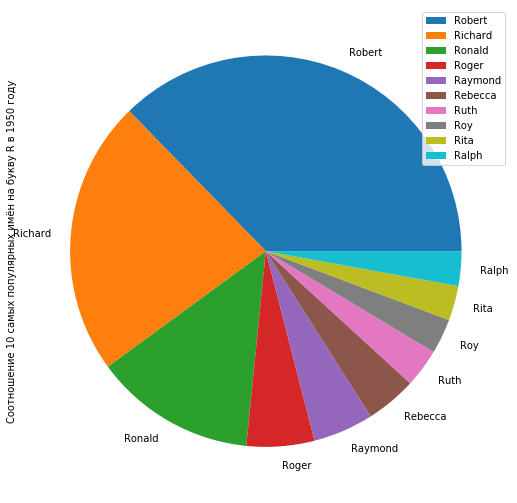

In [15]:
#Решение задачи 3

reg_ex = 'R[a-z]+'
names_1950 = csv_to_df('1950')
names_r_50 = names_1950[names_1950['Names'].str.contains(reg_ex)]
names_r_50.groupby(['Names']).sum().sort_values(by='Count', ascending=False).head(10).plot(\
                                                kind='pie', y='Count', rot=45, \
                                         label = 'Соотношение 10 самых популярных имён на букву R в 1950 году')



Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

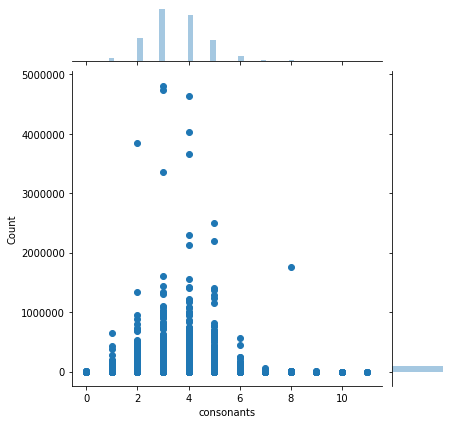

In [16]:
# Решение задачи 4
task4_names = names_xx_cent.groupby(['Names']).sum()
letters = task4_names.index.str.extractall('(?i)(?P<vowels>[aeiyou])|(?P<consonants>[a-z])')\
                                                                     .groupby(level=0).count()
# решение на базе http://qaru.site/questions/7168608/how-to-count-vowels-and-consonants-in-pandas-dataframe-both-uppercase-and-lowercase

res_data = pd.merge(task4_names, letters, on=task4_names.index)

sns.jointplot(x='consonants', y='Count', data=res_data, kind='scatter')


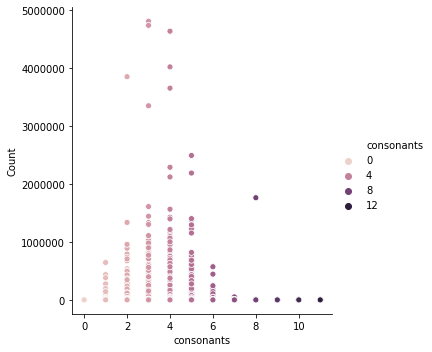

In [17]:
sns.relplot(x='consonants', y='Count', hue = 'consonants', data=res_data)